# Laplace Mechanism

## Libraries

In [1]:
import math
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import laplace

## Contextualization

In [2]:
"""
-------------
| Dataset X |
--------------------------
| User         Has HIV   |
--------------------------
| Andrew       False     |
| Bob          True      |
| Carly        True      |
| Dean         True      |
| Ernest       False     |
| Florence     False     |
--------------------------

Assume the function F as a count query, where:

F = number of individuals which hold HIV

Then, F(X) = 3.

Now, the neighbouring Dataset Y can be generated either from:
    1. Dataset X added in another user such {Gary:False} or {Harry:True}
    2. Dataset X removed in one existing user such {Andrew:False} or {Bob:True}
    3. Dataset X modified in one existing user such {Andrew:False} to {Andrew:True} or {Andrew:False} to {Andy:False}

Thus, F(Y) can assume values 2, 3 or 4 depending on Y's generation pattern.
"""

# Response of function F applied to dataset X
fx = 3

# Responses of function F applied to the possible datasets Y
fy = [2, 3, 4]

# Sensitivity of a count query (always equals to one)
delta_s = 1

# Standard epsilon values in order of magnitude -- lower to higher
eps = [0.01, 0.1, 0.5, 1.0, 2.0, 3.0]

# Mean of the Laplace distribution (always equals to zero)
laplace_mean = 0.0

## Proofs

In [3]:
print("Sensitivity = {}".format(delta_s))

for i_fy in fy:
    print("\nF(X) = {}\nF(Y) = {}".format(fx, i_fy))
    
    for j_eps in eps:
        # Sampling noise from the Laplace distribution with zero mean and (sensitivity/epsilon) scale
        noise = laplace.rvs(loc=laplace_mean, scale=delta_s/j_eps, size=1)[0]
        
        # Generate one possible z output from the sum of fx + noise
        z = fx + noise
        
        # Calculate the probability of occurrence of the output z in datasets X and Y, respectively
        fx_prob = laplace.pdf(x=z, loc=fx, scale=delta_s/j_eps)
        fy_prob = laplace.pdf(x=z, loc=i_fy, scale=delta_s/j_eps)
        
        print("\n\tEpsilon = {}\n".format(j_eps))
        
        print("\t\tNoise = {}\n\t\tz (F(X) + noise) = {}\n".format(round(noise, 2), round(z, 2)))
        
        print("\t\tProb(Fx(z)) = {} %\n\t\tProb(Fy(z)) = {} %".format(round(fx_prob, 5), round(fy_prob, 5)))
        print("\t\tProb(Fx(z)) / Prob(Fy(z)) = {}\n".format(round((fx_prob/fy_prob), 5)))
        
        print("\t\tExp(epsilon) = {}\n\t\tExp(-epsilon) = {}\n".format(round(math.exp(j_eps), 5), round(math.exp(-j_eps), 5)))
        
        print("\t\tProb(Fx(z)) / Prob(Fy(z)) <= Exp(epsilon) ?")
        print("\t\t{} <= {} ?\n\t\t{}\n".format(round((fx_prob/fy_prob), 5), round(math.exp(j_eps), 5), (round((fx_prob/fy_prob), 5) <= round(math.exp(j_eps), 5))))
        
        print("\t\tProb(Fx(z)) / Prob(Fy(z)) >= Exp(-epsilon) ?")
        print("\t\t{} >= {} ?\n\t\t{}".format(round((fx_prob/fy_prob), 5), round(math.exp(-j_eps), 5), (round((fx_prob/fy_prob), 5) >= round(math.exp(-j_eps), 5))))
        

Sensitivity = 1

F(X) = 3
F(Y) = 2

	Epsilon = 0.01

		Noise = 38.23
		z (F(X) + noise) = 41.23

		Prob(Fx(z)) = 0.00341 %
		Prob(Fy(z)) = 0.00338 %
		Prob(Fx(z)) / Prob(Fy(z)) = 1.01005

		Exp(epsilon) = 1.01005
		Exp(-epsilon) = 0.99005

		Prob(Fx(z)) / Prob(Fy(z)) <= Exp(epsilon) ?
		1.01005 <= 1.01005 ?
		True

		Prob(Fx(z)) / Prob(Fy(z)) >= Exp(-epsilon) ?
		1.01005 >= 0.99005 ?
		True

	Epsilon = 0.1

		Noise = 0.6
		z (F(X) + noise) = 3.6

		Prob(Fx(z)) = 0.0471 %
		Prob(Fy(z)) = 0.04262 %
		Prob(Fx(z)) / Prob(Fy(z)) = 1.10517

		Exp(epsilon) = 1.10517
		Exp(-epsilon) = 0.90484

		Prob(Fx(z)) / Prob(Fy(z)) <= Exp(epsilon) ?
		1.10517 <= 1.10517 ?
		True

		Prob(Fx(z)) / Prob(Fy(z)) >= Exp(-epsilon) ?
		1.10517 >= 0.90484 ?
		True

	Epsilon = 0.5

		Noise = 0.57
		z (F(X) + noise) = 3.57

		Prob(Fx(z)) = 0.18833 %
		Prob(Fy(z)) = 0.11423 %
		Prob(Fx(z)) / Prob(Fy(z)) = 1.64872

		Exp(epsilon) = 1.64872
		Exp(-epsilon) = 0.60653

		Prob(Fx(z)) / Prob(Fy(z)) <= Exp(epsilon) ?
		1.6

## Histrograms

# of Samples = 200

Sensitivity = 1

eps = 0.01


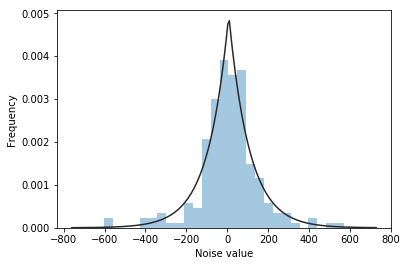


eps = 0.1


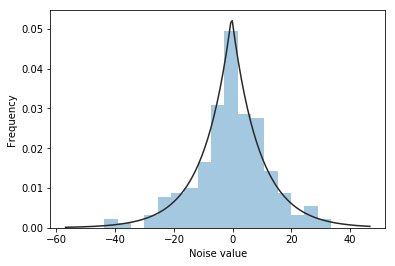


eps = 0.5


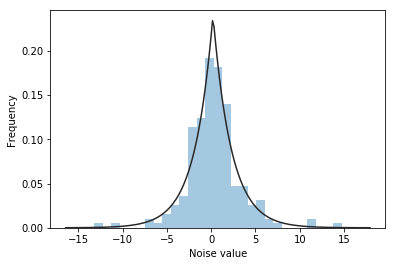


eps = 1.0


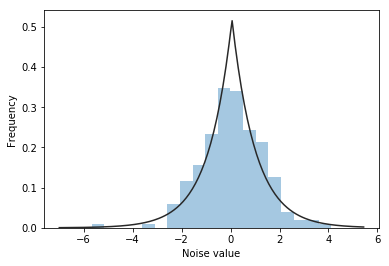


eps = 2.0


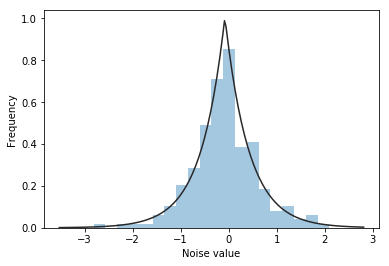


eps = 3.0


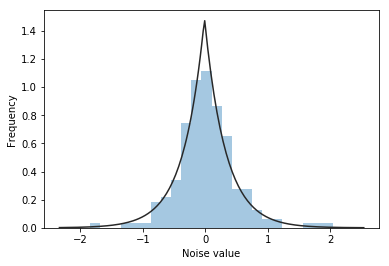

In [4]:
number_of_samples = 200

print("# of Samples = {}\n\nSensitivity = {}".format(number_of_samples, delta_s))

for i_eps in eps:
    print("\neps = {}".format(i_eps))
    
    samples = laplace.rvs(loc=laplace_mean, scale=delta_s/i_eps, size=number_of_samples)
    
    sns.distplot(samples, fit=laplace, kde=False)
    
    plt.xlabel("Noise value")
    plt.ylabel("Frequency")
    plt.show()
